# Assignment 1 
### COVID-19 



##### ทำการ import libraly ที่ต้องใช้

In [2]:
import urllib
import requests
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
import json
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np
import requests
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [4]:
url = 'https://covid19-api.weedmark.systems/api/v1/stats'
r = requests.get(url)
j = r.json()


In [5]:
#เอาข้อมูลเข้า Data Frame 
df = pd.DataFrame(j)
df = pd.DataFrame(j["data"]["covid19Stats"])
df

,city,province,country,lastUpdate,keyId,confirmed,deaths,recovered
0,None,None,Afghanistan,2020-10-01T04:23:42+00:00,Afghanistan,39268,1458,32789.0
1,None,None,Albania,2020-10-01T04:23:42+00:00,Albania,13649,387,7847.0
2,None,None,Algeria,2020-10-01T04:23:42+00:00,Algeria,51530,1736,36174.0
3,None,None,Andorra,2020-10-01T04:23:42+00:00,Andorra,2050,53,1432.0
4,None,None,Angola,2020-10-01T04:23:42+00:00,Angola,4972,183,1941.0
...,...,...,...,...,...,...,...,...
3950,None,None,West Bank and Gaza,2020-10-01T04:23:42+00:00,West Bank and Gaza,39899,311,31743.0
3951,None,None,Western Sahara,2020-10-01T04:23:42+00:00,Western Sahara,10,1,8.0
3952,None,None,Yemen,2020-10-01T04:23:42+00:00,Yemen,2034,587,1286.0
3953,None,None,Zambia,2020-10-01T04:23:42+00:00,Zambia,14759,332,13959.0


In [6]:
#saveข้อมูลเก็บเป็น .csv เพื่อเก็บเป็น staging area
df.to_csv("data/covid-19_api.csv",index=False)

In [68]:
#เปิดข้อมูลจากไฟล์ covid-19_api
df = pd.read_csv("data/covid-19_api.csv")
df

,city,province,country,lastUpdate,keyId,confirmed,deaths,recovered
0,NaN,NaN,Afghanistan,2020-10-01T04:23:42+00:00,Afghanistan,39268,1458,32789.0
1,NaN,NaN,Albania,2020-10-01T04:23:42+00:00,Albania,13649,387,7847.0
2,NaN,NaN,Algeria,2020-10-01T04:23:42+00:00,Algeria,51530,1736,36174.0
3,NaN,NaN,Andorra,2020-10-01T04:23:42+00:00,Andorra,2050,53,1432.0
4,NaN,NaN,Angola,2020-10-01T04:23:42+00:00,Angola,4972,183,1941.0
...,...,...,...,...,...,...,...,...
3950,NaN,NaN,West Bank and Gaza,2020-10-01T04:23:42+00:00,West Bank and Gaza,39899,311,31743.0
3951,NaN,NaN,Western Sahara,2020-10-01T04:23:42+00:00,Western Sahara,10,1,8.0
3952,NaN,NaN,Yemen,2020-10-01T04:23:42+00:00,Yemen,2034,587,1286.0
3953,NaN,NaN,Zambia,2020-10-01T04:23:42+00:00,Zambia,14759,332,13959.0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3955 entries, 0 to 3954
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        3264 non-null   object 
 1   province    3787 non-null   object 
 2   country     3955 non-null   object 
 3   lastUpdate  3955 non-null   object 
 4   keyId       3955 non-null   object 
 5   confirmed   3955 non-null   int64  
 6   deaths      3955 non-null   int64  
 7   recovered   614 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 247.3+ KB


In [37]:
#ตรวจสอบการซ้ำของข้อมูล
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3950    False
3951    False
3952    False
3953    False
3954    False
Length: 3955, dtype: bool

In [38]:
#พบว่า column city, province มีค่าว่าง
df.isnull().sum()

city           691
province       168
country          0
lastUpdate       0
keyId            0
confirmed        0
deaths           0
recovered     3341
dtype: int64

In [39]:
#เช็คประเภทของข้อมูล เพื่อให้ทราบว่าเป็น data type ประเภทไหน
df.dtypes

city           object
province       object
country        object
lastUpdate     object
keyId          object
confirmed       int64
deaths          int64
recovered     float64
dtype: object

In [40]:
df['country'].value_counts()

US                 3270
Russia               83
Japan                49
India                37
Colombia             34
                   ... 
Venezuela             1
Kenya                 1
North Macedonia       1
Zimbabwe              1
Cameroon              1
Name: country, Length: 188, dtype: int64

In [41]:
df['province'].value_counts()

Texas               255
Georgia             161
Virginia            134
Kentucky            121
Missouri            117
                   ... 
Kumamoto              1
Capital District      1
Andalusia             1
Chongqing             1
Uttar Pradesh         1
Name: province, Length: 562, dtype: int64

In [11]:
for i in df :
  print(df[i].value_counts(),'\n')

Unassigned    51
Washington    30
Jefferson     26
Franklin      25
Lincoln       24
              ..
Lavaca         1
Grimes         1
Deschutes      1
Snohomish      1
Greenbrier     1
Name: city, Length: 1919, dtype: int64 

Texas                  255
Georgia                161
Virginia               134
Kentucky               121
Missouri               117
                      ... 
Sachsen                  1
Los Rios                 1
Rio Grande do Norte      1
Sinaloa                  1
Sumy Oblast              1
Name: province, Length: 562, dtype: int64 

US            3270
Russia          83
Japan           49
India           37
Colombia        34
              ... 
Kyrgyzstan       1
Madagascar       1
Georgia          1
Uzbekistan       1
Cuba             1
Name: country, Length: 188, dtype: int64 

2020-10-01T04:23:42+00:00    3952
2020-08-04T02:27:56+00:00       2
2020-08-07T22:34:20+00:00       1
Name: lastUpdate, dtype: int64 

Osceola, Michigan, US         1
Modoc, Calif

In [42]:
#เติมค่าที่หายไปของคอลัมภ์ city ให้เป็น Unknown
df["city"]= df["city"].fillna('Unknown')
df

,city,province,country,lastUpdate,keyId,confirmed,deaths,recovered
0,Unknown,NaN,Afghanistan,2020-10-01T04:23:42+00:00,Afghanistan,39268,1458,32789.0
1,Unknown,NaN,Albania,2020-10-01T04:23:42+00:00,Albania,13649,387,7847.0
2,Unknown,NaN,Algeria,2020-10-01T04:23:42+00:00,Algeria,51530,1736,36174.0
3,Unknown,NaN,Andorra,2020-10-01T04:23:42+00:00,Andorra,2050,53,1432.0
4,Unknown,NaN,Angola,2020-10-01T04:23:42+00:00,Angola,4972,183,1941.0
...,...,...,...,...,...,...,...,...
3950,Unknown,NaN,West Bank and Gaza,2020-10-01T04:23:42+00:00,West Bank and Gaza,39899,311,31743.0
3951,Unknown,NaN,Western Sahara,2020-10-01T04:23:42+00:00,Western Sahara,10,1,8.0
3952,Unknown,NaN,Yemen,2020-10-01T04:23:42+00:00,Yemen,2034,587,1286.0
3953,Unknown,NaN,Zambia,2020-10-01T04:23:42+00:00,Zambia,14759,332,13959.0


In [43]:
#เติมค่าที่หายไปของคอลัมภ์ province ให้เป็น Unknown
df["province"]= df["province"].fillna('Unknown')
df

,city,province,country,lastUpdate,keyId,confirmed,deaths,recovered
0,Unknown,Unknown,Afghanistan,2020-10-01T04:23:42+00:00,Afghanistan,39268,1458,32789.0
1,Unknown,Unknown,Albania,2020-10-01T04:23:42+00:00,Albania,13649,387,7847.0
2,Unknown,Unknown,Algeria,2020-10-01T04:23:42+00:00,Algeria,51530,1736,36174.0
3,Unknown,Unknown,Andorra,2020-10-01T04:23:42+00:00,Andorra,2050,53,1432.0
4,Unknown,Unknown,Angola,2020-10-01T04:23:42+00:00,Angola,4972,183,1941.0
...,...,...,...,...,...,...,...,...
3950,Unknown,Unknown,West Bank and Gaza,2020-10-01T04:23:42+00:00,West Bank and Gaza,39899,311,31743.0
3951,Unknown,Unknown,Western Sahara,2020-10-01T04:23:42+00:00,Western Sahara,10,1,8.0
3952,Unknown,Unknown,Yemen,2020-10-01T04:23:42+00:00,Yemen,2034,587,1286.0
3953,Unknown,Unknown,Zambia,2020-10-01T04:23:42+00:00,Zambia,14759,332,13959.0


In [44]:
#เพิ่ม cloumn active เพื่อให้รู้ว่ามีคนที่ยังมีชีวิตอยู่กี่คน
df['Active'] = df['confirmed'] - df['recovered'] -df["deaths"] 
df.head()

,city,province,country,lastUpdate,keyId,confirmed,deaths,recovered,Active
0,Unknown,Unknown,Afghanistan,2020-10-01T04:23:42+00:00,Afghanistan,39268,1458,32789.0,5021.0
1,Unknown,Unknown,Albania,2020-10-01T04:23:42+00:00,Albania,13649,387,7847.0,5415.0
2,Unknown,Unknown,Algeria,2020-10-01T04:23:42+00:00,Algeria,51530,1736,36174.0,13620.0
3,Unknown,Unknown,Andorra,2020-10-01T04:23:42+00:00,Andorra,2050,53,1432.0,565.0
4,Unknown,Unknown,Angola,2020-10-01T04:23:42+00:00,Angola,4972,183,1941.0,2848.0


In [45]:
#group by ข้อมูลที่ถูกเก็บจากล่าสุดเพื่อจะได้รู้จำนวนของยอดผู้ติดเชื้อทั่วโลก
Data = df.groupby(["lastUpdate"])[["confirmed","deaths","recovered","Active"]].sum().reset_index()
Data

,lastUpdate,confirmed,deaths,recovered,Active
0,2020-08-04T02:27:56+00:00,152,3,0.0,0.0
1,2020-08-07T22:34:20+00:00,0,0,0.0,0.0
2,2020-10-01T04:23:42+00:00,33967941,1014158,23637164.0,863415.0


In [46]:
#ทำตารางขึ้นมาให้รู้จำนวน คอนเฟิร์ม(ว่าเป็น covid), ตาย, หายแล้ว, ที่ยังมีชีวิตอยู่

labels = ["lastUpdate","confirmed","deaths","recovered","Active"]
fig = go.Figure(data=[go.Table(header=dict(values=labels),
                            
                     
                 cells=dict(values=Data.loc[2,["lastUpdate","confirmed","deaths","recovered","Active"]],
                             line_color='white',
                            font = dict(color = 'black', size = 12)))
                     ])
fig.update_layout(
    title='Coronavirus in the word : '+ str(Data["confirmed"][2]),
)
fig.show()




In [48]:
Data_country = df.groupby(["country"])["confirmed","recovered","deaths"].sum().reset_index().sort_values("deaths",ascending=False).reset_index(drop=True)
Data_country 

,country,confirmed,recovered,deaths
0,US,7233042,2840688.0,206932
1,Brazil,4810935,4274774.0,143952
2,India,6312584,5273201.0,98678
3,Mexico,743216,628007.0,77646
4,United Kingdom,455846,2373.0,42233
...,...,...,...,...
183,Seychelles,144,140.0,0
184,Cambodia,277,275.0,0
185,Eritrea,375,341.0,0
186,Laos,23,22.0,0


In [47]:
#จำนวนผู้เสียชีวิตในแต่ละประเทศ พบว่าประเทศไทยอยู่อันดับที่ 59 และ ประเทศที่มีอันดับผู้เสียชีวิตมากที่สุดคือ US และ India
headerColor = 'grey'
rowEvenColor = 'lightgrey'
rowOddColor = 'white'

fig = go.Figure(data=[go.Table(
  header=dict(
    values=['ประเทศ','จำนวนผู้เสียชีวิต'],
    line_color='white',
    fill_color='#2d4059',
    align=['center','center'],
      
    font=dict(color='white', size=16)
  ),
  cells=dict(
    values=[
      Data_country['country'],
      Data_country['deaths'],
      ],
    line_color='white',
    fill_color='#decdc3',
    align = ['center', 'center'],
    font = dict(color = 'darkslategray', size = 12)
    ))
])
fig.update_layout(
    title='จำนวนผู้เสียชีวิตในแต่ละประเทศ',
)
fig.show()

In [20]:
fig = go.Figure(go.Bar(
            x=Data_country['confirmed'],
            y=Data_country['country'],
            orientation='h'))
fig.update_layout(
    title='จำนวนผู้ติดเชื้อ covid-19 ในแต่ละประเทศ',
    template='plotly_white',
     xaxis_title="Confirmed Cases",
    yaxis_title="Countries",
)
fig.show()

In [21]:
fig = go.Figure(go.Bar(
            x=Data_country['recovered'],
            y=Data_country['country'],
            orientation='h'))
fig.update_layout(
    title='จำนวนที่หายจาก covid-19 ในแต่ละประเทศ',
    template='plotly_white',
     xaxis_title="Confirmed Cases",
    yaxis_title="Countries",
)
fig.show()

In [49]:
#สนใจจำนวนยอดผู้ติดเชื้อในอินเดีย เนื่องจากเป็นประเทศที่อยู่ในทวีปเอเชียและมียอดผู้ติดเชื้อมากทีุ่ด
Data_ID = df[(df['country'] == 'India') ].reset_index(drop=True)
Data_ID


,city,province,country,lastUpdate,keyId,confirmed,deaths,recovered,Active
0,Unknown,Andaman and Nicobar Islands,India,2020-10-01T04:23:42+00:00,"Andaman and Nicobar Islands, India",3835,53,3608.0,174.0
1,Unknown,Andhra Pradesh,India,2020-10-01T04:23:42+00:00,"Andhra Pradesh, India",693484,5828,629211.0,58445.0
2,Unknown,Arunachal Pradesh,India,2020-10-01T04:23:42+00:00,"Arunachal Pradesh, India",9796,16,6890.0,2890.0
3,Unknown,Assam,India,2020-10-01T04:23:42+00:00,"Assam, India",180811,697,145618.0,34496.0
4,Unknown,Bihar,India,2020-10-01T04:23:42+00:00,"Bihar, India",182728,904,169732.0,12092.0
5,Unknown,Chandigarh,India,2020-10-01T04:23:42+00:00,"Chandigarh, India",11938,162,9813.0,1963.0
6,Unknown,Chhattisgarh,India,2020-10-01T04:23:42+00:00,"Chhattisgarh, India",113602,957,81718.0,30927.0
7,Unknown,Dadra and Nagar Haveli and Daman and Diu,India,2020-10-01T04:23:42+00:00,"Dadra and Nagar Haveli and Daman and Diu, India",3040,2,2929.0,109.0
8,Unknown,Delhi,India,2020-10-01T04:23:42+00:00,"Delhi, India",279715,5361,247446.0,26908.0
9,Unknown,Goa,India,2020-10-01T04:23:42+00:00,"Goa, India",33418,428,28125.0,4865.0


In [50]:
Data_id_state= Data_ID.groupby(["province"])["confirmed","recovered","deaths"].sum().reset_index().sort_values("confirmed",ascending=False).reset_index(drop=True)
Data_id_state

,province,confirmed,recovered,deaths
0,Maharashtra,1384446,1088322.0,36662
1,Andhra Pradesh,693484,629211.0,5828
2,Karnataka,601767,485268.0,8864
3,Tamil Nadu,597602,541819.0,9520
4,Uttar Pradesh,399082,342415.0,5784
5,Delhi,279715,247446.0,5361
6,West Bengal,257049,225759.0,4958
7,Odisha,219119,185700.0,842
8,Kerala,196106,128224.0,742
9,Telangana,193600,163407.0,1135


In [26]:
fig = px.pie(Data_id_state,values=Data_id_state['confirmed'], names=Data_id_state['province'],
             title='จำนวนผู้ติดเชื้อ covid-19 ในประเทศอินเดีย(แบ่งตามจังหวัด)',
            hole=0.5)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [51]:
#ยอดผู้ติดเชื้อในแต่ะเมืองของบราซิล
Data_BZ = df[(df['country'] == 'Brazil') ].reset_index(drop=True)
Data_BZ

,city,province,country,lastUpdate,keyId,confirmed,deaths,recovered,Active
0,Unknown,Acre,Brazil,2020-10-01T04:23:42+00:00,"Acre, Brazil",28222,659,25041.0,2522.0
1,Unknown,Alagoas,Brazil,2020-10-01T04:23:42+00:00,"Alagoas, Brazil",86879,2072,83608.0,1199.0
2,Unknown,Amapa,Brazil,2020-10-01T04:23:42+00:00,"Amapa, Brazil",48254,709,36098.0,11447.0
3,Unknown,Amazonas,Brazil,2020-10-01T04:23:42+00:00,"Amazonas, Brazil",139326,4156,116119.0,19051.0
4,Unknown,Bahia,Brazil,2020-10-01T04:23:42+00:00,"Bahia, Brazil",310526,6744,296207.0,7575.0
5,Unknown,Ceara,Brazil,2020-10-01T04:23:42+00:00,"Ceara, Brazil",241159,8994,214221.0,17944.0
6,Unknown,Distrito Federal,Brazil,2020-10-01T04:23:42+00:00,"Distrito Federal, Brazil",192245,3255,181308.0,7682.0
7,Unknown,Espirito Santo,Brazil,2020-10-01T04:23:42+00:00,"Espirito Santo, Brazil",131490,3545,121026.0,6919.0
8,Unknown,Goias,Brazil,2020-10-01T04:23:42+00:00,"Goias, Brazil",209411,4672,199091.0,5648.0
9,Unknown,Maranhao,Brazil,2020-10-01T04:23:42+00:00,"Maranhao, Brazil",173564,3756,163892.0,5916.0


In [74]:
Data_BZ_state= Data_BZ.groupby(["province"])["confirmed","recovered","deaths"].sum().reset_index().sort_values("confirmed",ascending=False).reset_index(drop=True)
Data_BZ_state

,province,confirmed,recovered,deaths
0,Sao Paulo,985628,855068.0,35622
1,Bahia,310526,296207.0,6744
2,Minas Gerais,295169,260674.0,7360
3,Rio de Janeiro,264783,241650.0,18487
4,Ceara,241159,214221.0,8994
5,Para,230449,215527.0,6573
6,Santa Catarina,215478,205075.0,2797
7,Goias,209411,199091.0,4672
8,Distrito Federal,192245,181308.0,3255
9,Rio Grande do Sul,190572,176768.0,4782


In [75]:
#สมมติถ้าอยากได้ 10 ประเทศก็ slicing เอา เช่น [0:10] งี้

fig = go.Figure(data=[go.Bar(
            x=Data_BZ_state['province'], y=Data_BZ_state['confirmed'],
            text=['confirmed'],
            textposition='auto',
            marker_color=['#7d0633','#821752','#0f3057','#00587a','#008891','#41aea9','#a6f6f1','#ccf6c8','#fafcc2','#f6d6ad','#f9c0c0'],

        )])
fig.update_layout(
    title='มาคิดเชื่อเรื่องใหม่หน่อย',
    xaxis_title="เมืองในประเทศบราซิล",
    yaxis_title="จำนวนผู้ติดเชื้อ",
    template='plotly_white'
)
fig.show()
#ความแออัดของเมืองมีผลต่อ covid-19 หรือไม่? เป็นการพูดถึงเรื่องของพื้นที่

In [69]:
#Pie chart แสดงจำนวนผู้เสียชีวิต , ผู้ติดเชื้อ , ผู้เสียชีวิต ในประเทศไทย
Data_TH = df[(df['country'] == 'Thailand') ].reset_index(drop=True)
Data_TH

,city,province,country,lastUpdate,keyId,confirmed,deaths,recovered
0,NaN,NaN,Thailand,2020-10-01T04:23:42+00:00,Thailand,3569,59,3379.0


In [66]:
Data_TH = Data_TH[Data_TH['lastUpdate'] == max(Data_TH['lastUpdate'])].reset_index()
Data_TH2= Data_TH.groupby(["city"])["confirmed","deaths","recovered","Active"].sum().reset_index().reset_index(drop=True)
Data_TH2

,city,confirmed,deaths,recovered,Active
0,Unknown,3569,59,3379.0,131.0


In [67]:
labels = ["Active ","recovered","deaths"]
values = Data_TH2.loc[0, ["Active","recovered","deaths"]]
df = px.data.tips()
fig = px.pie(Data_TH2, values=values, names=labels, color_discrete_sequence=['#679b9b','#6a2c70','#821752'], hole=0.5)
fig.update_layout(
    title='covid-19 Thailand : '+str(Data_TH2["confirmed"][0]),
)
fig.show()

In [73]:
#ตั้งสมมติฐานว่าแบบ เมืองที่มีสาธารณสุขที่ดี น่าจะมีการควบคุมโรคที่ดี
Data_JP = df[(df['country'] == 'Japan') ].reset_index(drop=True)
Data_JP

,city,province,country,lastUpdate,keyId,confirmed,deaths,recovered
0,NaN,Aichi,Japan,2020-10-01T04:23:42+00:00,"Aichi, Japan",5370,86,4877.0
1,NaN,Akita,Japan,2020-10-01T04:23:42+00:00,"Akita, Japan",53,0,51.0
2,NaN,Aomori,Japan,2020-10-01T04:23:42+00:00,"Aomori, Japan",36,1,34.0
3,NaN,Chiba,Japan,2020-10-01T04:23:42+00:00,"Chiba, Japan",3896,71,3506.0
4,NaN,Ehime,Japan,2020-10-01T04:23:42+00:00,"Ehime, Japan",114,6,108.0
5,NaN,Fukui,Japan,2020-10-01T04:23:42+00:00,"Fukui, Japan",244,11,229.0
6,NaN,Fukuoka,Japan,2020-10-01T04:23:42+00:00,"Fukuoka, Japan",5044,98,4837.0
7,NaN,Fukushima,Japan,2020-10-01T04:23:42+00:00,"Fukushima, Japan",253,3,209.0
8,NaN,Gifu,Japan,2020-10-01T04:23:42+00:00,"Gifu, Japan",626,10,585.0
9,NaN,Gunma,Japan,2020-10-01T04:23:42+00:00,"Gunma, Japan",701,19,611.0


In [110]:
D_JP = Data_JP.groupby('province')['deaths'].sum().sort_values(ascending=False).to_frame()
D_JP.style.background_gradient(cmap='cubehelix_r')

,deaths
province,
Tokyo,408
Osaka,206
Kanagawa,139
Hokkaido,107
Saitama,102
Fukuoka,98
Aichi,86
Chiba,71
Hyogo,59


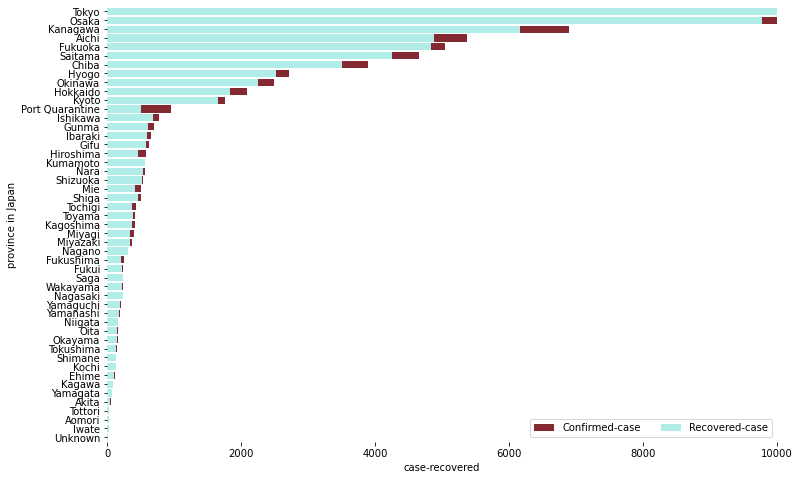

In [100]:
#ทำ stack chart เพื่อเปรียบเทียบระหว่างยอดผู้ติดเชื้อ-และได้รับการรักษาจนหายดี
f, ax = plt.subplots(figsize=(12, 8))
dt = Data_JP[['confirmed','deaths','recovered']]
Data_JP.sort_values('confirmed',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="confirmed", y="province", data=Data_JP,
            label="Confirmed-case", color="#931a25")

sns.set_color_codes("muted")
sns.barplot(x="recovered", y="province", data=Data_JP,
            label="Recovered-case", color="#a6f6f1")


ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 10000), ylabel="province in Japan",
       xlabel="case-recovered")
sns.despine(left=True, bottom=True)

In [111]:
#เว็บ Terrabkk พูดถึง10เมืองที่มีประชากรหนาแน่นที่สุดในโลก 
#สมมติฐานคือ ความหนาแน่นของประชากรส่งผลต่อยอดผู้ติดเชื้อ covid-19 หรือไม่?

Data_Jap = df[(df['province'] == 'Tokyo') ].reset_index(drop=True)
Data_Ind = df[(df['province'] == 'Delhi') ].reset_index(drop=True)
Data_Chi = df[(df['province'] == 'Shanghai') ].reset_index(drop=True)
Data_Bra = df[(df['province'] == 'Sao Paulo') ].reset_index(drop=True)
Data_Mex = df[(df['province'] == 'Mexico City') ].reset_index(drop=True)
Data_Jap,Data_Ind,Data_Chi,Data_Bra ,Data_Mex

(  city province country                 lastUpdate         keyId  confirmed  \
 0  NaN    Tokyo   Japan  2020-10-01T04:23:42+00:00  Tokyo, Japan      25751   
 
    deaths  recovered  
 0     408    22956.0  ,
   city province country                 lastUpdate         keyId  confirmed  \
 0  NaN    Delhi   India  2020-10-01T04:23:42+00:00  Delhi, India     279715   
 
    deaths  recovered  
 0    5361   247446.0  ,
   city  province country                 lastUpdate            keyId  \
 0  NaN  Shanghai   China  2020-10-01T04:23:42+00:00  Shanghai, China   
 
    confirmed  deaths  recovered  
 0       1006       7      947.0  ,
   city   province country                 lastUpdate              keyId  \
 0  NaN  Sao Paulo  Brazil  2020-10-01T04:23:42+00:00  Sao Paulo, Brazil   
 
    confirmed  deaths  recovered  
 0     985628   35622   855068.0  ,
 Empty DataFrame
 Columns: [city, province, country, lastUpdate, keyId, confirmed, deaths, recovered]
 Index: [])

In [114]:
Data_Jap["confirmed"]

0    25751
Name: confirmed, dtype: int64